In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive"
!pip install -q keras

'10foldRADIO_COVID .ipynb'   CT			    own
 Bangla_Iso		     edit.ipynb		   'RATNet(99.80).ipynb'
 CBAM_model.ipynb	     EYE		    Selected_model.ipynb
 CMATERdb		    'Getting started.pdf'   Untitled0.ipynb
'Colab Notebooks'	     ISI		    Untitled1.ipynb
 COVID			     OCR


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#np.random.seed(1337) 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input/testing-daata"))
#print(os.listdir("../input/thirty-two-tr"))

# Any results you write to the current directory are saved as output.

In [4]:
# load in libaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras import models
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras import optimizers
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
weight_decay = 1e-6
from keras.regularizers import l2
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.layers.normalization import BatchNormalization
earlystopping = EarlyStopping(monitor='val_loss',patience=10,verbose=1,mode='auto')
import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv2D, Activation, MaxPool2D, Dropout, Dense, BatchNormalization, Flatten
from keras.callbacks import ModelCheckpoint
from keras.models import Model, Input
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Average, Dropout
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.optimizers import Adam
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import l2
from six.moves import cPickle as pickle
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

Using TensorFlow backend.


In [6]:
# Lets load in the data
Xtrain = np.load('/content/drive/My Drive/ISI/ISI_D/ISI_32/Xtrain_ISIT32.npy')
Ytrain = np.load('/content/drive/My Drive/ISI/ISI_D/ISI_32/Ytrain_ISIdigit32.npy')
Xtest = np.load('/content/drive/My Drive/ISI/ISI_D/ISI_32/Xtest_ISIdigit32.npy')
Ytest = np.load('/content/drive/My Drive/ISI/ISI_D/ISI_32/Ytest_ISIdigit32.npy')
#Xvalid = np.load('/content/drive/My Drive/ISI_BC/Xvalid_BC.npy')
#Yvalid = np.load('/content/drive/My Drive/ISI_BC/Yvalid_BC.npy')
print('X shape : {}  Y shape: {}'.format(Xtrain.shape, Ytrain.shape))
#print('X shape : {}  Y shape: {}'.format(Xtest.shape, Ytest.shape))

#plt.imshow(X[700], cmap='gray')
#print(Y[700]) # one-hot labels starting at zero

X shape : (19392, 32, 32)  Y shape: (19392, 10)


In [7]:
#create a data generator using Keras image preprocessing
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.10,  
        height_shift_range=0.10,  
        horizontal_flip=False, 
        vertical_flip=False)

In [8]:
from sklearn.model_selection import train_test_split

#train, Xtest, Ytrain, Ytest = train_test_split(Xtrain, Ytrain, test_size=.30)
# add another axis representing grey-scale
#Xvalid, Xtest, yvalid, Ytest = train_test_split(Xvalid,yvalid, test_size=0.66)
Xtrain = Xtrain[:,:,:,np.newaxis]
#Xvalid = Xvalid[:,:,:,np.newaxis]
Xtest = Xtest[:,:,:,np.newaxis]
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)


(19392, 32, 32, 1)
(19392, 10)
(4000, 32, 32, 1)
(4000, 10)


In [9]:
datagen.fit(Xtrain)

In [ ]:
def cbam_block(cbam_feature, ratio=8):
    
    cbam_feature = spatial_attention(cbam_feature)
    return cbam_feature


def spatial_attention(input_feature):
    kernel_size = 7
    
    if K.image_data_format() == "channels_first":
        channel = input_feature._keras_shape[1]
        cbam_feature = Permute((2,3,1))(input_feature)
    else:
        channel = input_feature._keras_shape[-1]
        cbam_feature = input_feature
    
    avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
    assert avg_pool._keras_shape[-1] == 1
    max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
    assert max_pool._keras_shape[-1] == 1
    concat = Concatenate(axis=3)([avg_pool, max_pool])
    assert concat._keras_shape[-1] == 2
    cbam_feature = Conv2D(filters = 1,
                    kernel_size=kernel_size,
                    strides=1,
                    padding='same',
                    activation='sigmoid',
                    kernel_initializer='he_normal',
                    use_bias=False)(concat)	
    assert cbam_feature._keras_shape[-1] == 1
    
    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)
        
    return multiply([input_feature, cbam_feature])

In [ ]:
def residual_block(y, nb_channels, _strides=(1, 1), _project_shortcut=False):
    shortcut = y

    # down-sampling is performed with a stride of 2
    y = Conv2D(nb_channels, kernel_size=(3, 3), strides=_strides, padding='same')(y)
    y = BatchNormalization()(y)
    y = LeakyReLU()(y)

    y = Conv2D(nb_channels, kernel_size=(3, 3), strides=(1, 1), padding='same')(y)
    y = BatchNormalization()(y)

    # identity shortcuts used directly when the input and output are of the same dimensions
    if _project_shortcut or _strides != (1, 1):
        # when the dimensions increase projection shortcut is used to match dimensions (done by 1×1 convolutions)
        # when the shortcuts go across feature maps of two sizes, they are performed with a stride of 2
        shortcut = Conv2D(nb_channels, kernel_size=(1, 1), strides=_strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    y = add([shortcut, y])
    y = LeakyReLU()(y)

    return y

In [ ]:
def create_model():
    
    dropRate = 0.5
    
    init = Input(SHAPE)
    x = Conv2D(32, (5, 5), activation=None, padding='same')(init) 
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(64, (5, 5), activation=None, padding='same')(x) 
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = cbam_block(x)
    x = residual_block(x, 64)
    x1 = MaxPooling2D((2,2))(x)
    
    x = Conv2D(128, (3, 3), activation=None, padding='same')(x1)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = cbam_block(x)
    x = residual_block(x, 128)
    x2 = MaxPooling2D((2,2))(x)
    
    x = Conv2D(128, (3, 3), activation=None, padding='same')(x2)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = cbam_block(x)
    x = residual_block(x, 128)
    x3 = MaxPooling2D((2,2))(x)

    x = Conv2D(256, (3, 3), activation=None, padding='same')(x3)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)
    x = cbam_block(x)
    x = residual_block(x, 256)
    x4 = MaxPooling2D((2,2))(x)  
    ginp1 = UpSampling2D(size=(2, 2), interpolation='bilinear')(x1)
    ginp2 = UpSampling2D(size=(4, 4), interpolation='bilinear')(x2)
    ginp3 = UpSampling2D(size=(8, 8), interpolation='bilinear')(x3)
    ginp4 = UpSampling2D(size=(16, 16), interpolation='bilinear')(x4)
    
    hypercolumn = Concatenate()([ginp1, ginp2, ginp3,ginp4]) 
    gap = GlobalAveragePooling2D()(hypercolumn)

    x = Dense(512, activation=None)(gap)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    
    x = Dense(256, activation=None)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    y = Dense(10, activation='softmax')(x)
   
    model = Model(init, y)
    return model
    model.summary()

In [ ]:
SHAPE=(32,32,1)
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from albumentations import *
from skimage.transform import resize

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, accuracy_score

from keras.layers import *
from keras.callbacks import *
from keras.optimizers import *
from keras.models import load_model, Model

import tensorflow as tf
from keras import backend as K
modell = create_model()
modell.summary()
'''schedule = SGDRScheduler(min_lr=1e-6,
                             max_lr=1e-3,
                             steps_per_epoch=np.ceil(EPOCHS/BATCH_SIZE),
                             lr_decay=0.9,
                             cycle_length=10,
                             mult_factor=2.)'''
from keras.optimizers import Adam
def compile_and_train(model, num_epochs):
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    checkPoint = ModelCheckpoint(filepath='/content/drive/My Drive/ISI/'+ model.name +'.{epoch:03d}-{loss:.5f}.hdf5', verbose=1, save_best_only=True)
    earlystopping = EarlyStopping(monitor='val_loss',
                              patience=30,
                              verbose=1,
                              mode='auto')
    lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.75, epsilon=0.0001, patience=6, verbose=1)    
    history = model.fit_generator(datagen.flow(Xtrain, Ytrain, batch_size=128),
                 epochs=num_epochs,verbose=2,
                 steps_per_epoch=64,
                 shuffle=True,
                 callbacks=[checkPoint,lr_reduce,earlystopping],
                 validation_data=(Xtest, Ytest)
                  )

    #model.save_weights('/content/drive/My Drive/CMATERdb/iso_32/Test/ISo_32.hdf5')
    model.save('/content/drive/My Drive/ISI/ISI_D/ISI_32/ISI_digit_32_model.h5')
    return history
                       
s1=compile_and_train(modell,200)
score=s1.model.evaluate(Xtest, Ytest)
print('Loss: {:.4f}  Accuaracy: {:.4}%'.format(score[0],score[1]*100))



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   832         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Epoch 1/200
 - 18s - loss: 0.7196 - accuracy: 0.7583 - val_loss: 2.4961 - val_accuracy: 0.1000

Epoch 00001: val_loss improved from inf to 2.49609, saving model to /content/drive/My Drive/CMATERdb/model_1.001-0.71964.hdf5
Epoch 2/200
 - 7s - loss: 0.2009 - accuracy: 0.9349 - val_loss: 3.0007 - val_accuracy: 0.1000

Epoch 00002: val_loss did not improve from 2.49609
Epoch 3/200
 - 7s - loss: 0.1185 - accuracy: 0.9630 - val_loss: 5.0819 - val_accuracy: 0.1000

Epoch 00003: val_loss did not improve from 2.49609
Epoch 4/200
 - 7s - loss: 0.1047 - accuracy: 0.9683 - val_loss: 4.9873 - val_accuracy: 0.1002

Epoch 00004: val_loss did not improve from 2.49609
Epoch 5/200
 - 7s - loss: 0.0941 - accuracy: 0.9712 - val_loss: 0.4496 - val_accuracy: 0.8440

Epoch 00005: val_loss improved from 2.49609 to 0.44955, saving model to /content/drive/My Drive/CMATERdb/model_1.005-0.09407.hdf5
Epoch 6/200
 - 7s - loss: 0.0743 - accuracy: 0.9762 - val_loss: 0.1904 - val_accuracy: 0.9435

Epoch 00006: val_los

In [ ]:
from sklearn.metrics import classification_report,precision_score,recall_score,accuracy_score,f1_score,cohen_kappa_score
yhat_probs = s1.model.predict(Xtest)
yhat_classes = np.argmax(yhat_probs, axis=1)
Y_real = np.argmax(Ytest, axis=1)
print("recall : ",recall_score(Y_real,yhat_classes, average='macro'))
print("precision : ", precision_score(Y_real, yhat_classes, average='macro'))
print("f1 score: ",f1_score(Y_real, yhat_classes , average='macro'))
print("cohen_kappa_score: ",cohen_kappa_score(Y_real, yhat_classes))
print("Classification report: \n",classification_report(Y_real, yhat_classes))

recall :  0.998
precision :  0.9980061971693335
f1 score:  0.99799936053987
cohen_kappa_score:  0.9977777777777778
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       400
           1       1.00      0.99      0.99       400
           2       1.00      1.00      1.00       400
           3       0.99      1.00      1.00       400
           4       1.00      1.00      1.00       400
           5       1.00      1.00      1.00       400
           6       1.00      1.00      1.00       400
           7       1.00      1.00      1.00       400
           8       1.00      1.00      1.00       400
           9       1.00      1.00      1.00       400

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



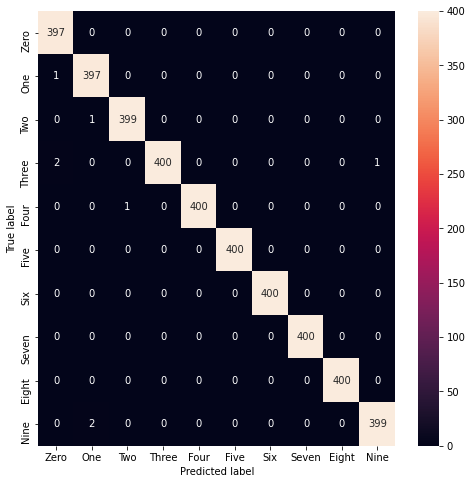

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])


In [ ]:
import matplotlib.pyplot as plt 
test_preds = s1.model.predict(Xtest)
test_classes = [np.argmax(x) for x in Ytest]
test_y_real = [np.argmax(x) for x in test_preds]
#from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(test_y_real, test_classes)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,dtype=np.int32,
                     index = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine'], 
                     columns = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine'])

plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True,fmt="d")
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(s1.model.history.history.keys())



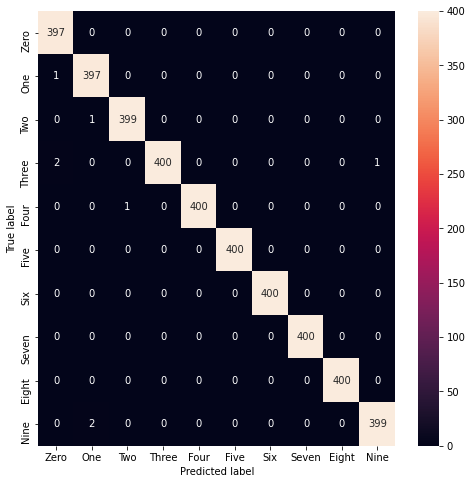

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])


In [ ]:
import matplotlib.pyplot as plt 
test_preds = s1.model.predict(Xtest)
test_classes = [np.argmax(x) for x in Ytest]
test_y_real = [np.argmax(x) for x in test_preds]
#from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(test_y_real, test_classes)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,dtype=np.int32,
                     index = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine'], 
                     columns = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine'])

plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True,fmt="d")
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(s1.model.history.history.keys())

